In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [26]:
data=pd.read_csv("Social_Network_Ads.csv")
print(data)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [27]:
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [28]:
le = LabelEncoder()

In [29]:
data['Gender']=le.fit_transform(data['Gender'])

In [30]:
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       1   19            19000          0
1  15810944       1   35            20000          0
2  15668575       0   26            43000          0
3  15603246       0   27            57000          0
4  15804002       1   19            76000          0


In [31]:
X = data[["Gender","Age","EstimatedSalary"]]
Y = data["Purchased"]

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [33]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
svm = SVC(kernel='linear',random_state=42)
svm.fit(X_train,Y_train)
y_pred= svm.predict(X_test)

In [35]:
print("Accuracy Score: ", accuracy_score(Y_test,y_pred))

Accuracy Score:  0.8666666666666667


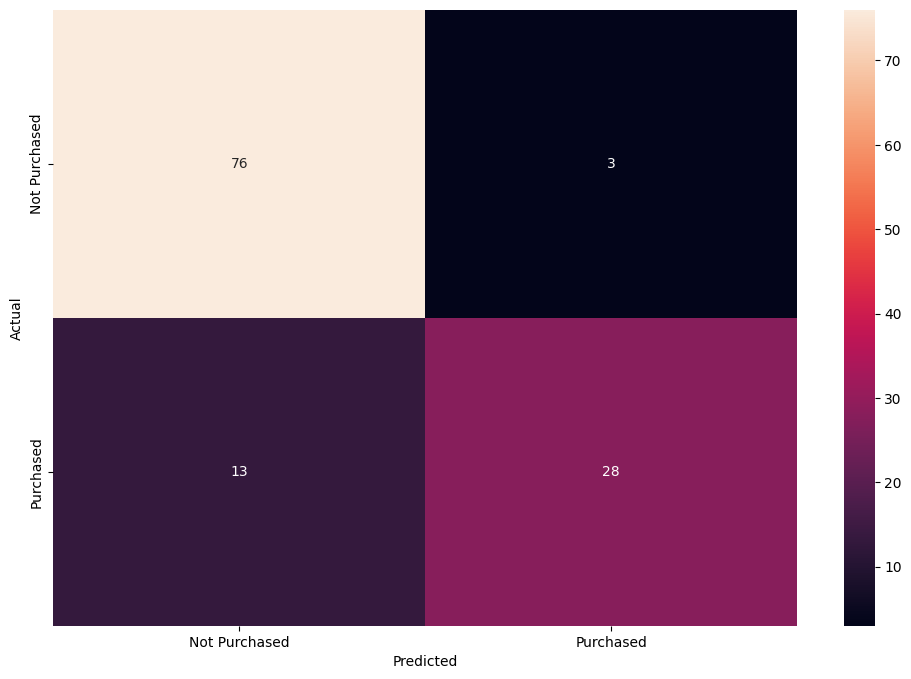

In [42]:
cm=confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True,xticklabels=['Not Purchased','Purchased'],yticklabels=['Not Purchased','Purchased'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()